## Visualisation de données avec matplotlib et pandas

Chargez le dataset Indicator et, en vous inspirant des notebooks relatifs à la visualisation par matplotlib et pandas proposés sur l'espace de cours, produisez des cellules de code réalisant pour répondre aux instructions suivantes. 

Les graphiques devront porter un titre. Leurs axes devront être nommés et les unités précisées. Utilisez éventuellement les légendes ou les échelles de couleur si nécessaire de sorte que le graphique soit suffisant pour véhiculer une information claire.

Affichez l'histogramme des valeurs d'émission de CO2 par habitant des pays sur l'année 1976.

In [2]:
#Chargez dans un dataframe pandas le fichiers Indicators.csv
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Indicators.csv')


C:\Users\gadji\AppData\Local\Temp\ipykernel_7288\2674652808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CO2.drop(columns=['IndicatorName','CountryCode','IndicatorCode','Year', ], inplace=True)


Text(0, 0.5, 'Nombre de pays')

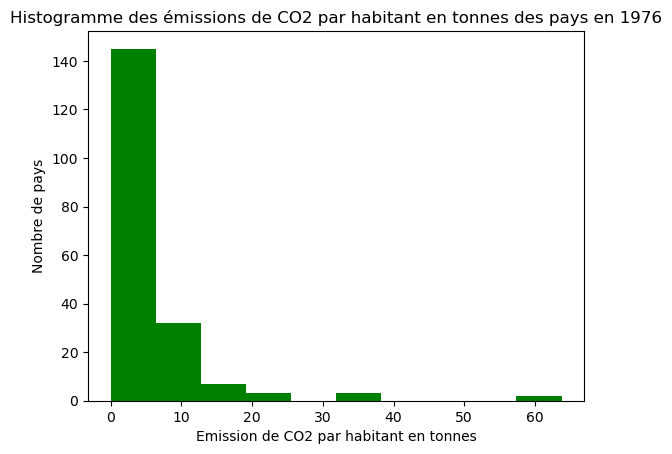

In [3]:
CO2=df[(df['IndicatorName']=='CO2 emissions (metric tons per capita)') & (df['Year']==1976)]
CO2.drop(columns=['IndicatorName','CountryCode','IndicatorCode','Year', ], inplace=True)
plt.hist(CO2['Value'],color='green') # en abscisse on les valeurs de l'émission de CO2 et en ordonnée le nbre de pays correspondant
plt.title("Histogramme des émissions de CO2 par habitant en tonnes des pays en 1976")
plt.xlabel('Emission de CO2 par habitant en tonnes')
plt.ylabel('Nombre de pays')

Utilisez un graphique en ligne pour afficher l'évolution des émission de CO2 par habitant sur l'ensemble des années disponibles pour les pays suivants : 
- Luxembourg
- Quatar
- Etats Unis d'Amérique
- Allemagne
- France
- Chine
- Inde
- Sénégal

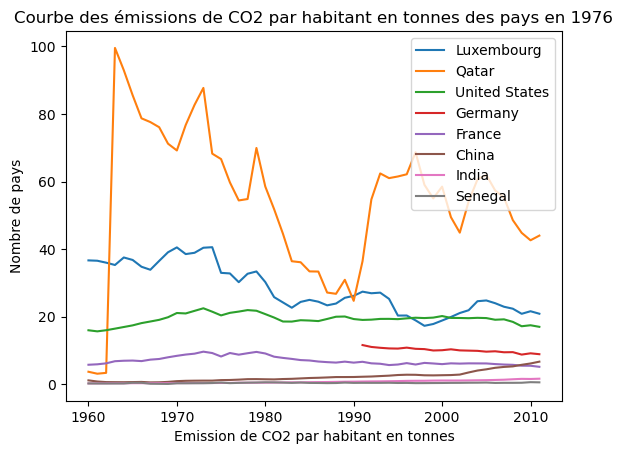

In [4]:
countries=['Luxembourg','Qatar','United States','Germany','France','China','India','Senegal']
plt.figure()
co2df=df[df['IndicatorName']=='CO2 emissions (metric tons per capita)']
for c in countries:
    data=co2df[co2df['CountryName']==c]
    plt.plot(data['Year'],data['Value'],label=c)
plt.title("Courbe des émissions de CO2 par habitant en tonnes des pays en 1976")
plt.xlabel('Emission de CO2 par habitant en tonnes')
plt.ylabel('Nombre de pays')
plt.legend(loc=1)


Utiliser un graphique en nuage de points pour afficher un graphique représentant en abscisse le PIB (GDP per capita (current US$)) et en ordonnée l'espérance de vie pour l'année 1985.

In [5]:
data85=df[df['Year']==1985]
pib=data85.loc[data85['IndicatorName']=='GDP per capita (current US$)',['CountryName','Value']]
lif=data85.loc[data85['IndicatorName']=='Life expectancy at birth, total (years)',['CountryName','Value']]

Text(0, 0.5, 'Life expectancy')

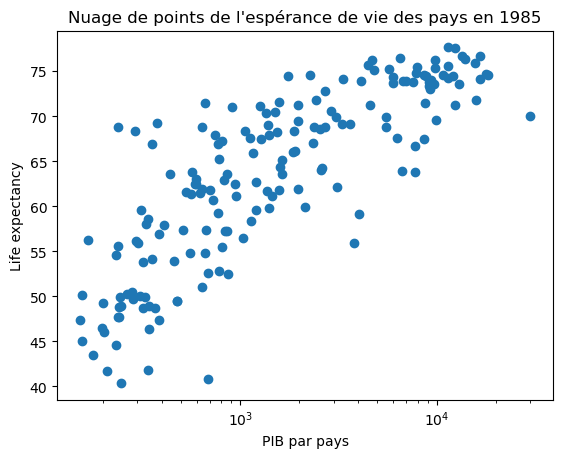

In [6]:
data1=pd.merge(pib,lif, how='inner',on='CountryName')
data1.columns=['CountryName','PIB','LIF']
plt.figure()
plt.scatter(data1['PIB'],data1['LIF'])
plt.xscale('log')
plt.title("Nuage de points de l'espérance de vie des pays en 1985")
plt.xlabel('PIB par pays')
plt.ylabel('Life expectancy')

Modifiez le graphique précédent de telle sorte que la surface des disques soit proportionnelle à la population du pays et que la couleur soit associée au taux d'alphabetisation (Adult literacy rate, population 15+ years, both sexes (%))

In [7]:
pop85=data85.loc[data85['IndicatorName']=='Population, total',['CountryName','Value']]
alph85=data85.loc[data85['IndicatorName']=='CO2 emissions (metric tons per capita)',['CountryName','Value']]


In [8]:
data2=pd.merge(pop85,alph85, how='outer',on='CountryName')
data2.columns=['CountryName','Population','CO2']
data2
data=pd.merge(data1,data2,on='CountryName')
data


,CountryName,PIB,LIF,Population,CO2
0,Arab World,1580.252659,61.848904,1.914254e+08,3.066959
1,Caribbean small states,2698.074456,68.754261,5.786277e+06,5.525586
2,East Asia & Pacific (all income levels),1394.469981,67.938233,1.682520e+09,2.250591
3,East Asia & Pacific (developing only),356.100545,66.917048,1.473633e+09,1.546489
4,Euro area,7818.682325,74.757644,3.059680e+08,7.897234
...,...,...,...,...,...
171,"Venezuela, RB",3309.089959,69.174854,1.750806e+07,5.784700
172,Vietnam,239.428695,68.852829,5.886800e+07,0.359549
173,Virgin Islands (U.S.),9256.074766,73.055732,1.070000e+05,NaN
174,Zambia,320.986286,48.734293,7.017292e+06,0.392447


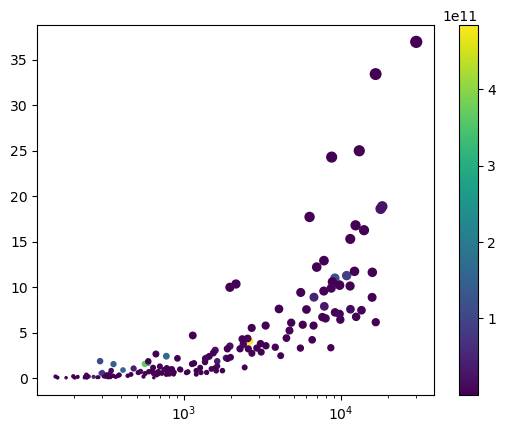

In [9]:
import numpy as np
plt.figure()
plt.scatter(data['PIB'],data['CO2'],s=np.sqrt(data['CO2']*100),c=data['Population']*100)
plt.xscale('log')
plt.colorbar()

Complétez le graphique en le dotant de fonctionnalités d'interaction de telle sorte qu'un clic sur un point permette l'affichage des informations suivantes relatives à l'année 1985 : 
- Nom du pays
- Valeur de l'espérance de vie
- Valeur du PIB
- Taille de la population
- Taux d'alphabétisation

Modifier le graphique en le transformant en une animation de sorte que les différentes frames permettent la visualisation des données pour les années successives.

Utilisez les fonctionnalités de la bibliothèque ipywidgets pour permettre l'affichage de l'évolution au fil des ans d'un indicateur (choisi dans une liste déroulante) pour deux pays, chacun étant choisi dans une liste déroulante.

Utilisez un widget pour sélectionner la date pour laquelle vous souhaitez visualiser le nuage de points (espérance de vie vs. PIB avec population et taux d'alphabétisation)